# Das Perceptron
Eines der grundlegensten Lernsysteme ist das sogenannte Perceptron. Es ist so aufgebaut:

<img width=800 height=800 class="imgright" src="Images/Perceptron.png">

Die Idee war dabei eine Nervenzelle oder ein Neuron im Computer nachzubauen. Hier die Skizze eines Neurons.<img width=600 src= "Images/neuron.jpg">

 Die Eingangswerte werden mit den zugehörigen Gewichten eingeben und zusammen mit dem bias summiert. Eine Aktivierungsfunktion (z.B. die Sigmoidfunktion) bestimmt dann den Output als Voraussagewert. Wir haben dieses Prinzip in unserem Klassifizierer genau so verwirklicht. Man kann deshalb das Perceptron trainieren wie unseren Klassifizierer und dann die optimalen Gewichte und den Bias bestimmen, damit die Voraussage möglichst oft mit dem wahren Wert übereinstimmt. Das Perzeptron ist ein sehr altes Konzept, welches bereits 1958 entwickelt wurde und sozusagen die "Mutter des überwachten Lernens und der künstlichen Intelligenz insgesamt" darstellt.<br> 
Der Erfinder Frank Rosenblatt beschrieb seine Erfindung in sehr enthusiastischer Weise und das Perzeptron wurde "als Embryo eines elektronischen Computers" beschrieben, von dem die amerikanische Navy (als Geldgeber des Projekts) erwartet, "daß er gehen kann, sprechen kann, sehen, schreiben und sich reproduzieren kann und sich seiner Existenz bewusst sein kann" wie die New York Times damals schrieb. Diese übertriebenen Erwartungen riefen dann auch Gegner auf den Plan und das sich gerade entwickelnde Feld kam in den späten sechziger Jahren zu einem abrupten Stillstand, als Minsky und Papert in einem Buch zeigten, dass das Perceptron das sogenannte XOR - Problem nicht lösen konnte. Außerdem nahmen sie fälschlicherweise an, das zusammengeschaltete Perceptrone, die dieses Problem überwinden könnten (wie wir unten zeigen) nicht trainierbar seien. Nach der dadurch ausgelösten Eiszeit der KI kam es erst in den 80 Jahren wieder zu einer Weiterführung dieses Konzeptes, das dann zu neuronalen Netzen führte mit ihren fantastischen Möglichkeiten, welche letztendlich lediglich eine Vernetzung von Perceptronen darstellen.


Wir können unseren Klassifikator benutzen, um ein Perzeptron für die logische ```AND``` , die ```OR``` und die ```XOR```- Funktion zu trainieren. Dazu haben wir die Dateien xor.txt, or.txt und and.txt produziert, die alle 100 Beispiele mit jeweils 2 Eingaben mit 1 oder 0 als Eingangswerten und den richtigen Ausgaben mit 1 oder 0 enthalten. Eine Übersicht über die erwarteten Ergebnisse inklusive derer für die XOR Verknüpfung zeigt untenstehende Tabelle.<br><br>
<table
style="text-align: left; width: 100%; background-color: rgb(255, 255, 102);"
border="1" cellpadding="2" cellspacing="2">
    
<th style="vertical-align: top;">Eingabe 1
</th>
<th style="vertical-align: top;">Eingabe 2
</th>
<th style="vertical-align: top;">AND
</th>
<th style="vertical-align: top;">OR
</th>
<th style="vertical-align: top;">XOR
</th>


<tr>
<td style="vertical-align: top;">
False (0)
</td>
<td style="vertical-align: top;">
False (0)
</td>
<td style="vertical-align: top;">
False
</td>
<td style="vertical-align: top;">
False
</td>
<td style="vertical-align: top;">
False
</td>    
</tr>

<tr>
<td style="vertical-align: top;">
True (1)
</td>
<td style="vertical-align: top;">
False (0)
</td>
<td style="vertical-align: top;">
False
</td>
<td style="vertical-align: top;">
True
</td>
<td style="vertical-align: top;">
True
</td>    
</tr>
    
<tr>
<td style="vertical-align: top;">
False (0)
</td>
<td style="vertical-align: top;">
True (1)
</td>
<td style="vertical-align: top;">
False
</td>
<td style="vertical-align: top;">
True
</td>
<td style="vertical-align: top;">
True
</td>    
</tr>
    
    
<tr>
<td style="vertical-align: top;">
True (1)
</td>
<td style="vertical-align: top;">
True (1)
</td>
<td style="vertical-align: top;">
True
</td>
<td style="vertical-align: top;">
True
</td>
<td style="vertical-align: top;">
False
</td>    
</tr>  

</table>


Man sieht , dass XOR nur dann True ergibt, wenn genau einer der beiden Eingaben True ist. Man nennt dies auch ```Exklusiv Oder```.

Wir lassen jetzt unsere Datei mit 100 Datensätzen durch das Perceptron laufen, dabei teilen wir in 50 Trainingsdatensätze und 50 Testdatensätze.<br> Für ```xor``` ergibt sich eine Accuracy von 0.56,<br> für ```and``` 0.96,<br> für ```or``` 0.98.

In [14]:
import math as m 
import random as rd
rd.seed(0)
# def sigmoid(x):
#     if x<-40: 
#         return 0.0 #sonst overflow error durch zu kleine Werte z.B. 1E-530
        
#     return 1/(1+m.exp(-x))
def sigmoid(x):
    return 1 if x>.5 else 0  #stufenfunktion statt sigmoid
def vorhersagen(x1,x2,x3,w1,w2,w3):
    yvor=[]
    for i in range(len(x1)):
        yvor.append(sigmoid(x1[i]*w1+x2[i]*w2+x3[i]*w3))
    return yvor

def verlust(yvor,y):    
    sum_loss=0
    for i in range(len(y)):
       sum_loss-=y[i]* m.log(yvor[i])+(1-y[i])*m.log(1-yvor[i])  #hier die logloss Funktion zur Fehlerberechnung 
    return sum_loss/len(y)

def gradient(yvor,y,x1,x2,x3):   #Ableitung der logloss Funktion zur Gradientbestimmung 
    sum1,sum2,sum3,sum4=0,0,0,0
    for  i in range(len(x1)):
        sum1-=(yvor[i]-y[i])*x1[i]
        sum2-=(yvor[i]-y[i])*x2[i]
        sum3-=(yvor[i]-y[i])*x3[i]
        
    return sum1,sum2,sum3

def trainieren(x1,x2,x3,y,reps,lernrate):
    w1,w2,w3,w4=0,0,0,0
    for i in range(reps):
        yvor=vorhersagen(x1,x2,x3,w1,w2,w3)
        wlist=gradient(vorhersagen(x1,x2,x3,w1,w2,w3),y,x1,x2,x3)        
        w1+=wlist[0]/len(x1)*lernrate
        w2+=wlist[1]/len(x1)*lernrate
        w3+=wlist[2]/len(x1)*lernrate
               
    return w1,w2,w3
    
def test(x1,x2,x3,y,w1,w2,w3):    
    yvor=vorhersagen(x1,x2,x3,w1,w2,w3)    
    richtig=0
    for i in range(len(x1)):
        print(f"Klassifikator: {round(yvor[i])} Eingabedaten: {y[i]}",end="")
        if round(yvor[i])==y[i]:
            print("  richtig klassifiziert")
            richtig+=1
        else:
            print("falsch")
    return richtig
    
    
Examples=[]
######################## xor oder and oder or #############
with open("Data/and.txt", "r") as fh:    
    for line in fh:        
        x1,x2,y=line.rstrip().split(",") 
        Examples.append([x1,x2,1,y]) #hier der konstante Wert 1 für den sog. Bias
        
x1,x2,x3,y=[],[],[],[]
for elem in Examples: 
    x1.append(int(elem[0])) #x1
    x2.append(int(elem[1])) #x2
    x3.append(int(elem[2])) #Bias
    
    y.append(int(elem[3])) #Label
x1tr,x2tr,x3tr,ytr=[],[],[],[]

for i in range(50):
    num=rd.randint(0,99-i)
    x1tr.append(x1[num])
    x2tr.append(x2[num])
    x3tr.append(x3[num])
    
    ytr.append(y[num])
    x1.remove(x1[num])
    x2.remove(x2[num])
    x3.remove(x3[num])
    
    y.remove(y[num])
    
    
w1,w2,w3=trainieren(x1tr,x2tr,x3tr,ytr,30000,0.001)
richtige=test(x1,x2,x3,y,w1,w2,w3)
print(w1,w2,w3)
print(f" Accuracy {richtige/50:5.2f}")
print(f"{richtige} von 50 richtig")

Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 1  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0falsch
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0falsch
Klassifikator: 1 Eingabedaten: 1  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 1  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 1  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabeda

Beim Trainieren für AND oder OR sehen wir , dass das Perzeptron fast 100% Erfolg erzielt.
Bei XOR sieht die Sache ganz anders aus. Hier kann das Perzeptron überhaupt nicht korrekt arbeiten. Die Ergebnisse für x1 und x2 sind dabei nämlich nicht linear separierbar, lassen sich beim Auftragen in einem 2 dimensionalen Plot nicht durch eine Gerade trennen. Dies ist aber die Voraussetzung für das Perzeptron, um korrekt arbeiten zu können. 

<img width=800 height=800 class="imgright" src="Images/linearesep.png">

Dieses aber als Argument für ein Scheitern des ganzen Ansatzes zu sehen, ist geradezu lächerlich. Wir können XOR durch <br>
<b>(Eingabe1 AND (NOT Eingabe2))  OR ((NOT Eingabe1) AND Eingabe2)</b> <br> ersetzen, und die Eingabe für ein Perzeptron umzudrehen ist sehr leicht, wie unten gezeigt.<br><br>
<img width=1200 height=1200 class="imgright" src="Images/XOR_3.png">


Diese Verknüpfung von Perzeptronen stellt den Grundbaustein eines neuronales Netzes dar, worauf wir im Weiteren eingehen werden. Unten nochmals die einfache programmatische Umsetzung des XOR Problems mit Hilfe unseres Klassifizierers aus verbundenen Perceptronen.

In [2]:
and_percep=[0.3800011900840308, 0.4549964986417659, -0.1608012006281719] #optimierte Gewichte für AND
or_percep=[0.4331867240143155, 0.5249362438579526, 0.29159881833861057]  #optimierte Gewichte für OR

def stufe(x):
    return 1 if x>.5 else 0  #stufenfunktion statt sigmoid

Examples=[]
###################################                                     ##############################
with open("Data/xor.txt", "r") as fh:    
    for line in fh:        
        x1,x2,y=line.rstrip().split(",")
        #print(x1,x2,y)
        Examples.append([x1,x2,1,y])
        
x1,x2,x3,x4,y=[],[],[],[],[]
for elem in Examples: 
    x1.append(int(elem[0])) #x1
    x2.append(int(elem[1])) #x2          
    x3.append(int(elem[2])) #x3  Bias 1   
    y.append(int(elem[3])) #y_werte
    
res_list=[]    
for i in range(len(x1)):
    
    res_and1 = x1[i] * and_percep[0] + (1 if x2[i]==0 else 0) * and_percep[1] + and_percep[2] #für NOT : x2.append(1 if int(elem[1])==0 else 0)    im Bild OBEN
    res_and2 = x2[i] * and_percep[1] + (1 if x1[i]==0 else 0) * and_percep[0] + and_percep[2] #                                                     im BILD UNTEN
    first_or=(stufe(res_and1)) #Stufenfunktion von x1 and not x2 mit den Gewichten für and
    second_or=(stufe(res_and2)) #Stufenfunktion von not x1 and x2 mit den Gewichten für and   
    res_ges = stufe(first_or * or_percep[0] + second_or * or_percep[1] + or_percep[2]) #Stufenfunktion von first_or und second_or
                                                                                    #mit den Gewichten für or
    res_list.append(res_ges)
                                                                  

for i in range(len(x1)):    
    print(f"Klassifikator: {res_list[i]} Originaldaten: {y[i]}",end="")
    print("  richtig klassifiziert" if res_list[i]==y[i] else "  falsch")

Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 1 Originaldaten: 1  richtig klassifiziert
Klassifikator: 0 Originaldaten: 0  richtig klassifiziert
Klassifikator: 1 Originaldaten:

Natürlich können wir das Perzeptron nicht nur für Boolsche Operationen nutzen. Wir wollen es jetzt als Klassifikator für einen Datensatz verwenden, den wir mit der sklearn-Bibliothek erzeugen. Wir geben unten das Ergebnis graphisch aus.


Die ersten 5 Werte: 
 Fetaures x1 x2 
 [[-7.19728919 -8.53378212]
 [ 5.3389375  -0.88319289]
 [-2.94630687  8.29654899]
 [ 6.51749169 -1.22516638]
 [-4.78812703 -4.38251862]],
 Label [2 1 0 1 2]
[] [[-7.19728919 -8.53378212]]


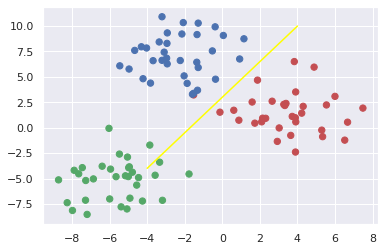

In [5]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
X,y=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=42, return_centers=False)
print("Die ersten 5 Werte: ")
print(f" Fetaures x1 x2 \n {X[:5]},\n Label {y[:5]}")
colormap=np.array(["b","r","g"])
print(X[:0],X[:1])
plt.scatter(X[:,0],X[:,1],color=colormap[y] ,s=40)
plt.plot((-4,4),(-4,10),color="yellow",linestyle="-")

Wir sehen, dass die Klassen mit jeweils 50 Punkten linear separierbar sind. Wenden wir jetzt das Perzeptron darauf an. Wieder haben wir zur Hälfte Trainigsdaten und zur Häfte Testdaten. 

Accuracy = 1.0
Gewichte 0.10291816339346742 -0.038446371392804775 0.5870738691554769


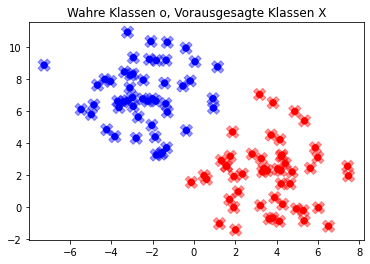

In [1]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


def vorhersagen(x1,x2,x3,w1,w2,w3):
    yvor=[]
    for i in range(len(x1)):
        yvor.append(x1[i]*w1+x2[i]*w2+w3)    
    return yvor

def stufe(x):
    return 1 if x>.5 else 0  

def gradient(yvor,y,x1,x2,x3):
    sum1,sum2,sum3=0,0,0
    for  i in range(len(x1)):
        sum1-=(yvor[i]-y[i])*x1[i]
        sum2-=(yvor[i]-y[i])*x2[i]
        sum3-=(yvor[i]-y[i])*x3[i]        
    return sum1,sum2,sum3

def trainieren(x1,x2,x3,y,reps,lernrate):
    w1,w2,w3=0,0,0
    
    for i in range(reps):
        yvor=vorhersagen(x1,x2,x3,w1,w2,w3)        
        wlist=gradient(vorhersagen(x1,x2,x3,w1,w2,w3),y,x1,x2,x3)        
        w1+=wlist[0]/len(x1)*lernrate
        w2+=wlist[1]/len(x1)*lernrate
        w3+=wlist[2]/len(x1)*lernrate
               
    return w1,w2,w3
    
def test(x1,x2,x3,y,w1,w2,w3):    
    yvor=vorhersagen(x1,x2,x3,w1,w2,w3)
     
    ergeb=[]
    for i in range(len(x1)):
        
        ergeb.append(stufe(yvor[i])==y[i])
        #print(round(yvor[i]),y[i])
        
    
    print(f"Accuracy = {ergeb.count(True)/len(ergeb)}")
    return yvor

X,yroh=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=42, return_centers=False) 


y=np.reshape(yroh ,(-1,1))
data=np.column_stack((X,y))
x1,x2,x3,y=[],[],[],[]

for elem in data: 

    x1.append(elem[0]) #x1
    x2.append(elem[1]) #x2          
    x3.append(1) #x3  Bias 1   
    y.append(elem[2]) #y_werte


w1,w2,w3=trainieren(x1,x2,x3,y,10000,0.001)
y_vor=test(x1,x2,x3,y,w1,w2,w3)
for index in range(len(y_vor)):
    y_vor[index]=stufe(y_vor[index])
print("Gewichte",w1,w2,w3) 
plt.title("Wahre Klassen o, Vorausgesagte Klassen X")
colormap=np.array(["b","r"])

plt.scatter(X[:,0],X[:,1],marker="X",color=colormap[y_vor],s=150,alpha=.4)
plt.scatter(X[:,0],X[:,1],color=colormap[yroh],s=40)

Mit Punkten markiert sind die wahren Werte, die Farbe entspricht der Klassenzugehörigkeit. Die Kreuze stellen die vorausgesagte Klassenzugehörigkeit der Punkte dar. Alle Punkte sind korrekt klassifiziert.

Wir wollen jetzt darstellen, wo das Perzeptron die Klassifikationsgrenze (auch Hyperplane genannt) erzeugt hat. Dazu überziehen wir unser Koordinatensystem mit einer grossen Anzahl von Punkten und geben in entsprechender Farbe zurück, was das Perzeptron für einen solchen Punkt vorhergesagt hätte. Wir verzichten hier noch bewußt auf Numpy und kompliziertere Grafiktechniken aus Matplotlib und begnügen uns mit einem einfachen Streudiagramm.

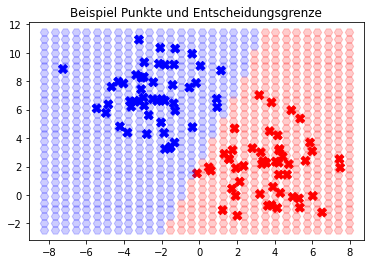

In [2]:


def predict(x1,x2,w1,w2,w3):    
    return stufe(x1*w1+x2*w2+w3)    
    
colormap=np.array(["blue","red"])
plt.title("Vorausgesagte Klassen")
plt.scatter(X[:,0],X[:,1],marker="X",color=colormap[y_vor],s=80)

min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

num_points = 30 #alle .1 auf der Achse einen Punkt für x und für y
plt.title("Beispiel Punkte und Entscheidungsgrenze")

output=[]
for i in range(num_points):
    for j in range(num_points):
        x=min_x+(max_x)
stepx=(max_x-min_x)/num_points
stepy=(max_y-min_y)/num_points
for xind in range(num_points):    
    for yind in range(num_points):        
        plt.scatter(min_x+xind*stepx,min_y+yind*stepy,\
                    color=colormap[predict(min_x+xind*stepx,min_y+yind*stepy,w1,w2,w3)],marker="H",s=70,alpha=.2)


Wir erkennen, daß die lineare Hyperfläche die Klassen separiert. Das Perzeptron kann diesen linear separierbaren Datensatz perfekt trennen.